# ▒ 주성분분석 ▒

## 0. 환경설정

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA

## 1. 데이터 준비

### 데이터 설명 (fat dataset)

- 252명의 남성의 나이, 몸무게, 키 등의 신체 정보와 비만도를 측정한 자료.

In [3]:
data_file = "./data/fat.csv"
fat = pd.read_csv(data_file)
print(fat.shape)
fat.head()

(252, 18)


,brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## 1. 주성분분석 (PCA)
### 주성분분석을 위해서는 설명 변수 데이터를 표준화하는 작업이 선행되어야 함.

In [4]:
fat_st = preprocessing.StandardScaler().fit_transform(fat)
feature_names = ['brozek', 'siri', 'density', 'age', 'weight', 
                 'height', 'adipos', 'free', 'neck', 'chest', 
                 'abdom', 'hip', 'thigh', 'knee', 'ankle', 'biceps', 
                 'forearm', 'wrist']
fat_st = pd.DataFrame(fat_st, columns=feature_names)
fat_st.head()

,brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,-0.819407,-0.820246,0.801647,-1.740073,-0.841246,-0.656205,-0.477058,-0.484401,-0.738665,-0.918048,-0.683533,-0.755929,-0.077479,-0.536131,-0.710826,-0.090676,-0.626718,-1.212541
1,-1.556273,-1.562573,1.565061,-1.819583,-0.193462,0.574790,-0.559456,0.966512,0.209365,-0.858621,-0.887963,-0.168502,-0.134736,-0.536131,0.175947,-0.588143,0.117079,-0.031943
2,0.731890,0.736245,-0.746240,-1.819583,-0.849769,-1.066536,-0.202398,-1.523123,-1.645475,-0.597144,-0.432643,-0.098570,0.037035,0.128592,0.530656,-1.151940,-1.717621,-1.749177
3,-1.039174,-1.047733,1.028039,-1.501543,0.198617,0.574790,-0.147466,1.153373,-0.244041,0.115976,-0.572026,0.181157,0.132464,-0.536131,-0.178762,0.041982,0.365012,-0.031943
4,1.145569,1.143327,-1.135844,-1.660563,0.181570,0.301235,0.044796,-0.583327,-1.480601,-0.418864,0.691719,0.279061,0.724121,1.499585,0.530656,-0.024347,-0.477959,-0.568578


- 주성분분석을 시행하자.

In [5]:
pca = PCA(n_components = 18)
pca_components = pca.fit_transform(fat_st)
pca_fat = pd.DataFrame(data=pca_components,columns=
                        ['pc1','pc2','pc3','pc4','pc5','pc6',
                         'pc7','pc8','pc9','pc10','pc11','pc12',
                         'pc13','pc14','pc15','pc16','pc17','pc18'])
pca_fat.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18
0,-2.686962,-0.588794,1.842965,0.423656,-0.245811,-0.245249,-0.058696,0.351113,0.143680,-0.073574,-0.312116,-0.176980,-0.290654,-0.281251,0.038494,0.049363,0.016184,0.001284
1,-1.821754,-3.120336,0.737673,0.263950,-0.103974,-0.122784,-0.594258,-0.471467,0.373021,-0.193772,0.184870,0.206591,-0.044047,-0.031603,-0.073317,-0.004496,0.040956,-0.000550
2,-1.891918,1.900563,2.911815,-0.893694,1.689662,0.521819,0.044909,-0.113441,0.208645,0.044528,-0.513848,-0.125734,-0.251897,0.192400,0.098415,-0.011308,0.129187,0.002837
3,-0.634725,-2.409151,0.825699,0.218584,-0.459951,-0.474242,-0.435643,-0.293271,-0.230545,0.538850,0.115739,-0.001487,0.242287,0.183190,-0.111733,-0.057920,0.057062,0.002088
4,0.904640,0.945138,2.304640,-1.769644,0.953840,0.450664,1.106476,-0.016729,0.327327,0.507356,-0.584120,-0.031051,-0.382337,-0.550708,-0.059936,0.105931,0.030869,0.006151


## 2. 최적의 주성분 수 계산하기
- Scree plot을 이용하여 최적의 주성분 수를 구함.
- Scree plot: PCA 분석 후 주성분 수를 선정하기 위해  고유벡터 방향의 분산 설명 정도를 나타낸 그림.
- 분산 변화율이 완만해지는 주성분의 수를 선정
- 해당 데이터의 경우 주성분 3개가 적당해보임

Text(0, 0.5, 'Propotion of Variance')

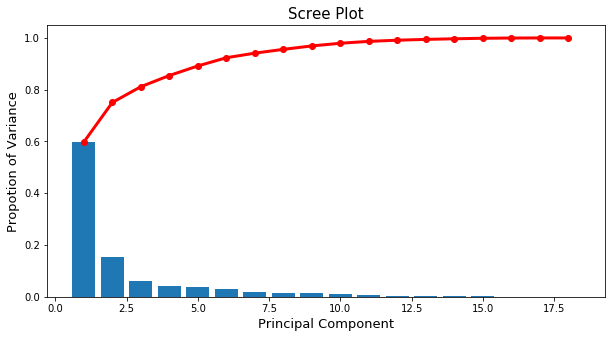

In [8]:
fig = plt.figure(figsize = (10, 5))
sing_vals = np.arange(18) + 1
vals = pca.explained_variance_ratio_
cumvals = np.cumsum(vals)
plt.bar(sing_vals, vals)
plt.plot(sing_vals, cumvals, 
         'ro-', linewidth = 3)
plt.title('Scree Plot', fontsize=15)
plt.xlabel('Principal Component', fontsize=13)
plt.ylabel('Propotion of Variance', fontsize=13)